In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
cols_needed = [
    'Severity',
    'Start_Time',
    'Weather_Condition',
    'Visibility(mi)',
    'Traffic_Signal'
]

df = pd.read_csv(
    "../cleaned_us_accidents.csv",
    usecols=cols_needed
)

print(df.head())


   Severity           Start_Time  Visibility(mi) Weather_Condition  \
0         3  2016-02-08 05:46:00            10.0        Light Rain   
1         2  2016-02-08 06:07:59            10.0        Light Rain   
2         2  2016-02-08 06:49:27            10.0          Overcast   
3         3  2016-02-08 07:23:34             9.0     Mostly Cloudy   
4         2  2016-02-08 07:39:07             6.0     Mostly Cloudy   

   Traffic_Signal  
0           False  
1           False  
2            True  
3           False  
4            True  


In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


In [15]:
df[['Severity', 'Hour', 'Weekday', 'Month']].head()


,Severity,Hour,Weekday,Month
0,3,5.0,Monday,February
1,2,6.0,Monday,February
2,2,6.0,Monday,February
3,3,7.0,Monday,February
4,2,7.0,Monday,February


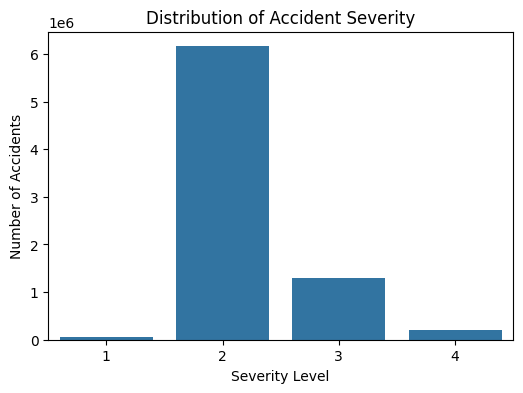

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df)
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


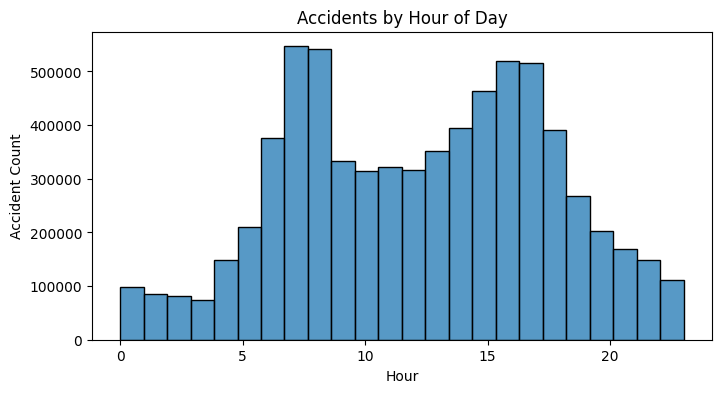

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['Hour'], bins=24)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.show()


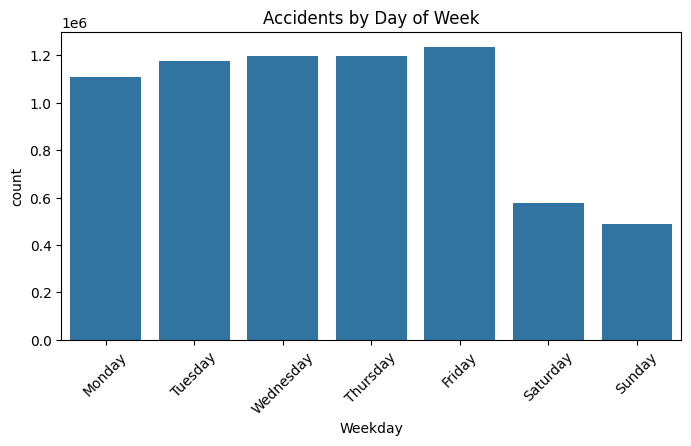

In [17]:
order_days = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

plt.figure(figsize=(8,4))
sns.countplot(x='Weekday', data=df, order=order_days)
plt.xticks(rotation=45)
plt.title("Accidents by Day of Week")
plt.show()


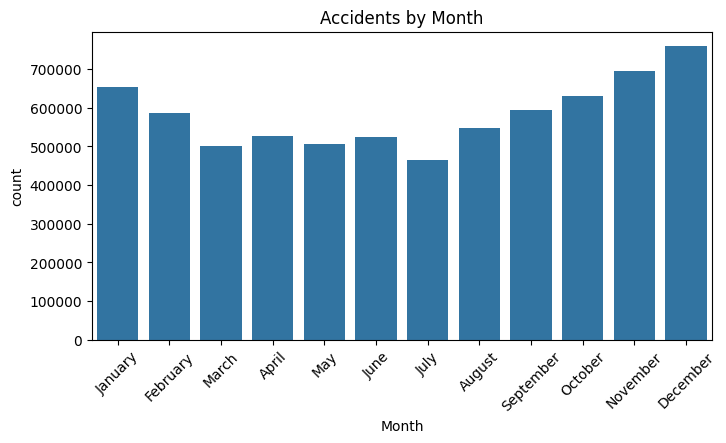

In [18]:
order_months = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, order=order_months)
plt.xticks(rotation=45)
plt.title("Accidents by Month")
plt.show()


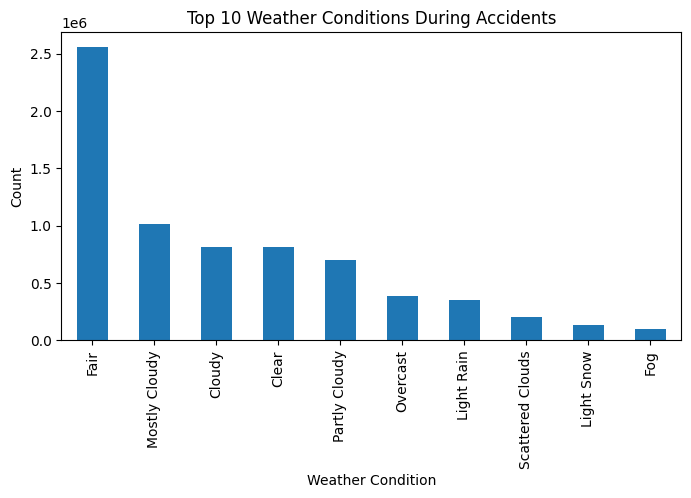

In [19]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_weather.plot(kind='bar')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()


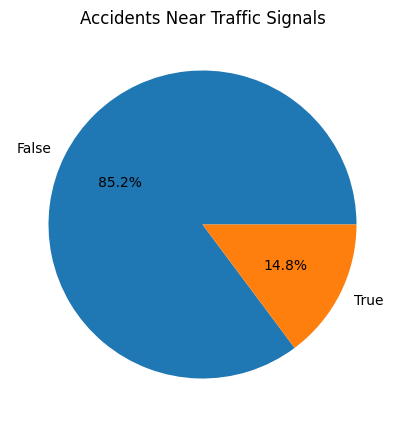

In [20]:
plt.figure(figsize=(5,5))
df['Traffic_Signal'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Accidents Near Traffic Signals")
plt.ylabel("")
plt.show()
